In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
s_df = pd.read_csv('task/student_data.csv')
s_df.head()

/home/harsha/bbdc24-mlbananas/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
s_df.groupby(['affect']).count()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,context
affect,,,,,,,,,,,,,
ANGRY,5,5,0,0,0,0,0,0,0,0,0,0,0
HAPPY,114,114,0,0,0,0,0,0,0,0,0,0,0
RELAXED,112,112,0,0,0,0,0,0,0,0,0,0,0
SAD,9,9,0,0,0,0,0,0,0,0,0,0,0


In [4]:
print(s_df.isnull().sum())
print("Data size (rows, columns):", s_df.shape)

sessionId             0
timestamp             0
x                338892
y                338892
z                338892
ppgValue         338892
hr              8487003
hrIbi           8487003
hrStatus        8487003
ibiStatus       8487003
notification    8824306
engagement      8824306
affect          8824438
context         8824445
dtype: int64
Data size (rows, columns): (8824678, 14)


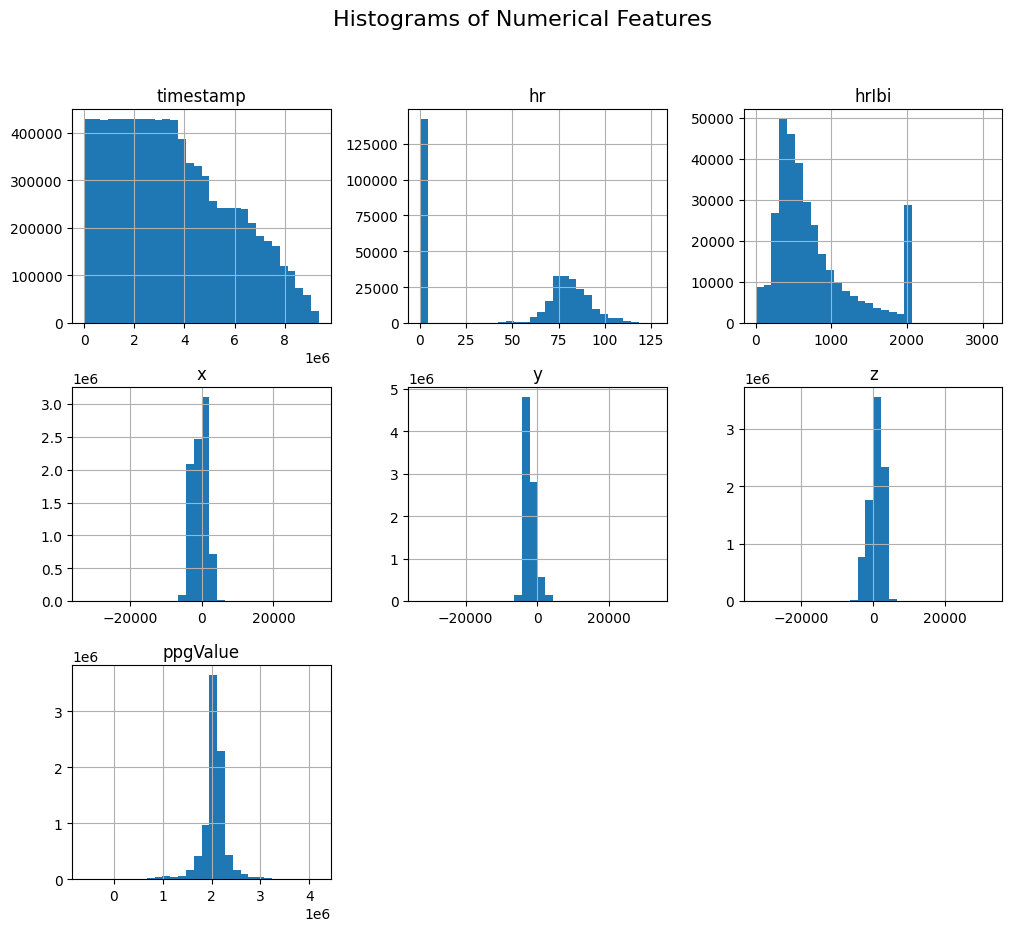

In [5]:
numerical_features = ['timestamp', 'hr', 'hrIbi', 'x', 'y', 'z', 'ppgValue','affect','context']
s_df[numerical_features].hist(bins=30,figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

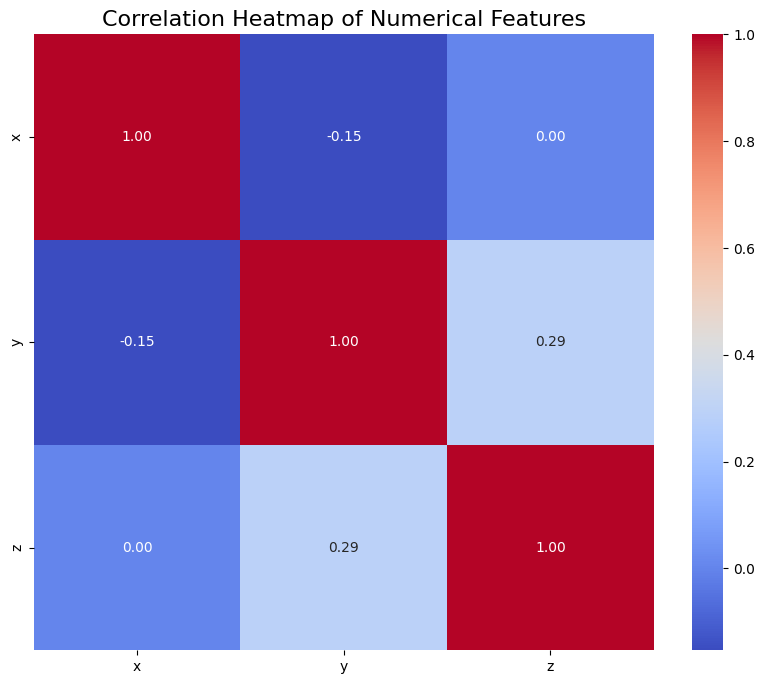

In [13]:
numerical_features = [ 'x', 'y', 'z', 'affect','context']
plt.figure(figsize=(10, 8))
sns.heatmap(s_df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

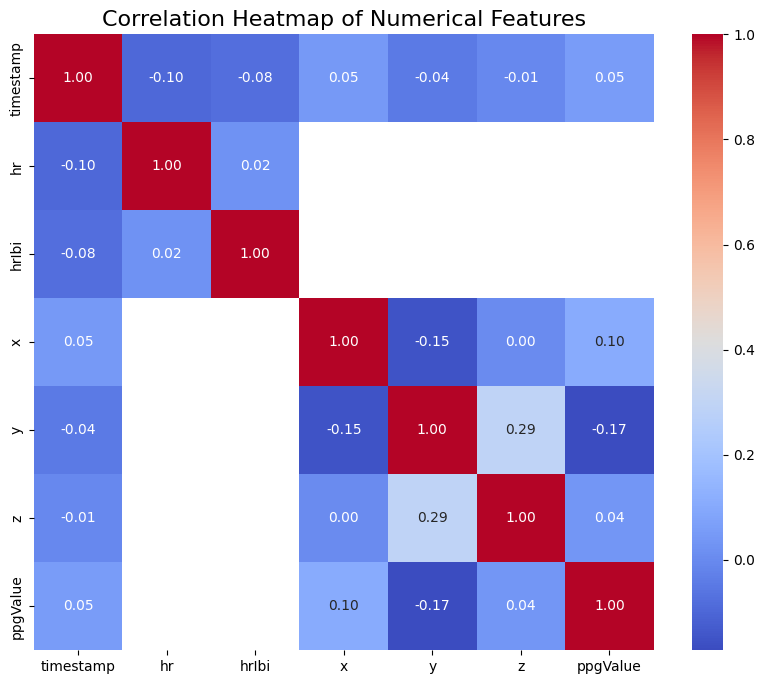

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(s_df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

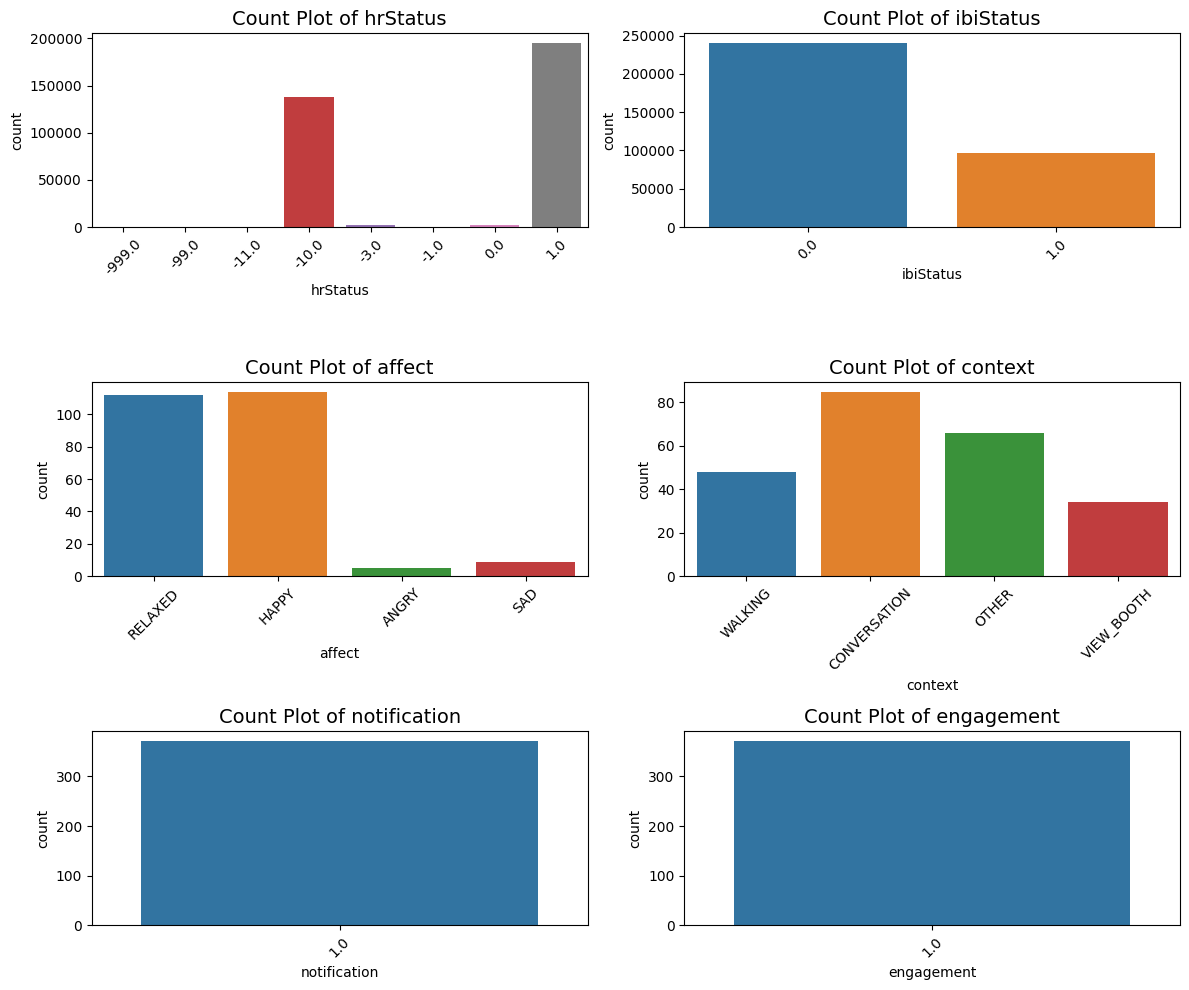

In [7]:
categorical_features = ['hrStatus', 'ibiStatus', 'affect', 'context', 'notification', 'engagement']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=s_df, x=feature)
    plt.title(f"Count Plot of {feature}", fontsize=14)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

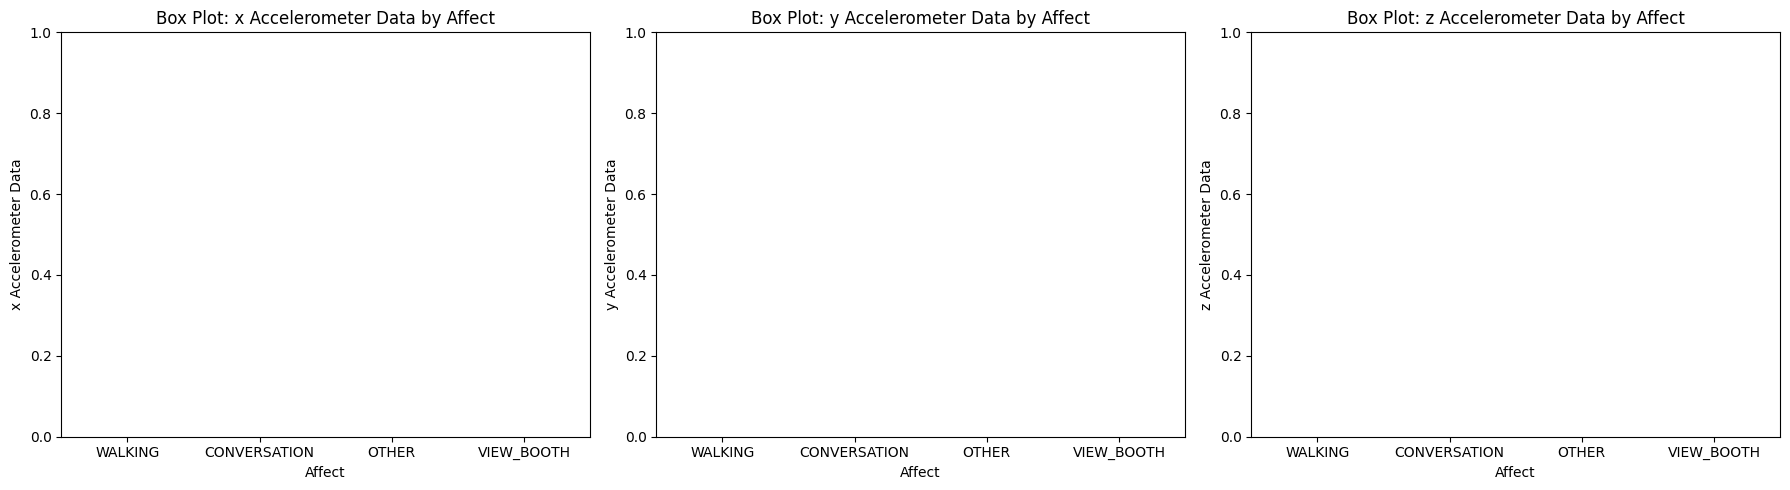

In [26]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='context', y='ppgValue', data=s_df)
plt.xlabel('Affect')
plt.ylabel('x Accelerometer Data')
plt.title('Box Plot: x Accelerometer Data by Affect')

plt.subplot(1, 3, 2)
sns.boxplot(x='context', y='y', data=s_df)
plt.xlabel('Affect')
plt.ylabel('y Accelerometer Data')
plt.title('Box Plot: y Accelerometer Data by Affect')

plt.subplot(1, 3, 3)
sns.boxplot(x='context', y='z', data=s_df)
plt.xlabel('Affect')
plt.ylabel('z Accelerometer Data')
plt.title('Box Plot: z Accelerometer Data by Affect')

plt.tight_layout()
plt.show()

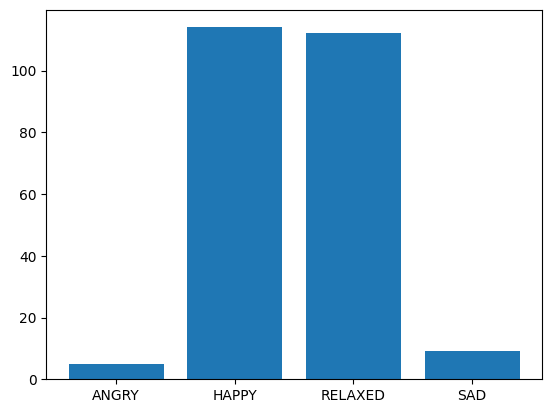

In [8]:
keys = [affect for affect, df in s_df.groupby(['affect'])]
plt.bar(keys,s_df.groupby(['affect']).count()['sessionId'])
plt.show()

In [9]:
s_df.groupby(['context']).count()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect
context,,,,,,,,,,,,,
CONVERSATION,85,85,0,0,0,0,0,0,0,0,0,0,0
OTHER,66,66,0,0,0,0,0,0,0,0,0,0,0
VIEW_BOOTH,34,34,0,0,0,0,0,0,0,0,0,0,0
WALKING,48,48,0,0,0,0,0,0,0,0,0,0,0


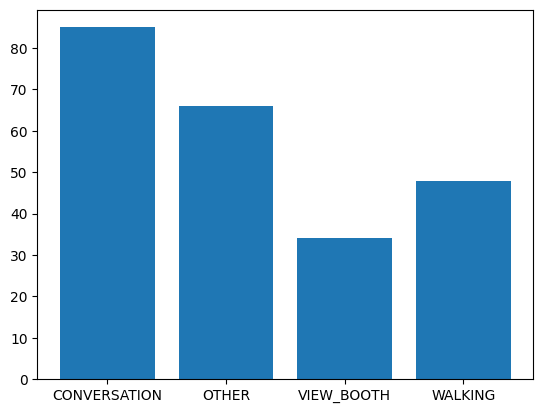

In [10]:
keys = [context for context, df in s_df.groupby(['context'])]
plt.bar(keys,s_df.groupby(['context']).count()['sessionId'])
plt.show()

In [11]:
for col in s_df.columns:
    percent_missing = np.mean(s_df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

sessionId - 0%
timestamp - 0%
x - 4%
y - 4%
z - 4%
ppgValue - 4%
hr - 96%
hrIbi - 96%
hrStatus - 96%
ibiStatus - 96%
notification - 100%
engagement - 100%
affect - 100%
context - 100%


In [12]:
print(s_df.dtypes)

sessionId         int64
timestamp         int64
x               float64
y               float64
z               float64
ppgValue        float64
hr              float64
hrIbi           float64
hrStatus        float64
ibiStatus       float64
notification    float64
engagement      float64
affect           object
context          object
dtype: object
